   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

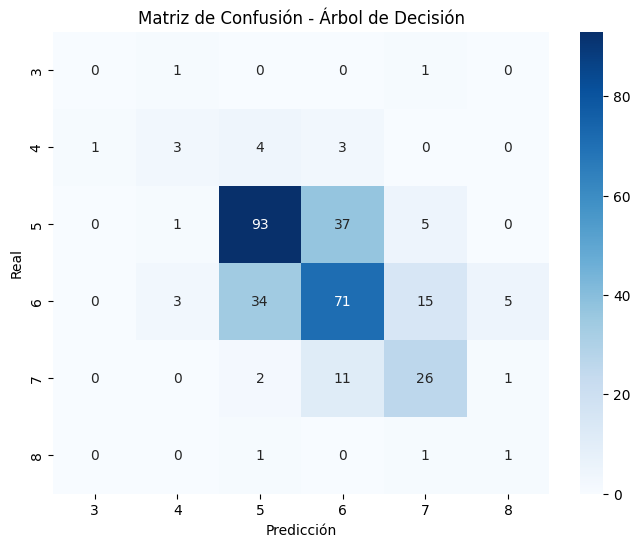

C:\Users\dania\AppData\Local\Temp\ipykernel_2332\2687856238.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


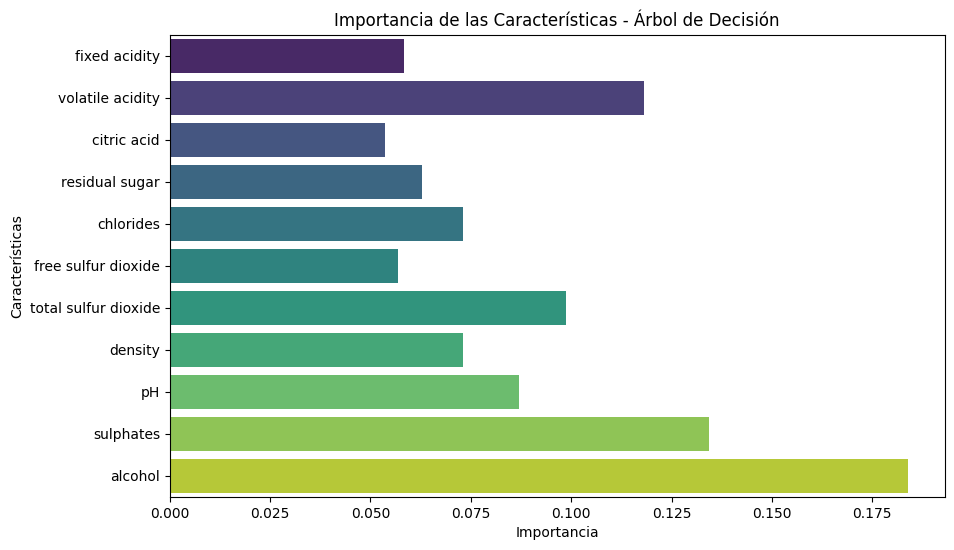

C:\Users\dania\AppData\Local\Temp\ipykernel_2332\2687856238.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wine_df, x='quality', palette='Set3')


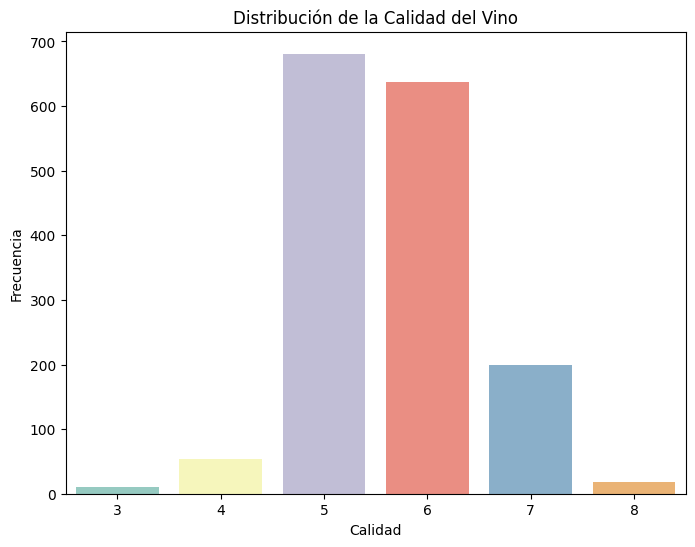

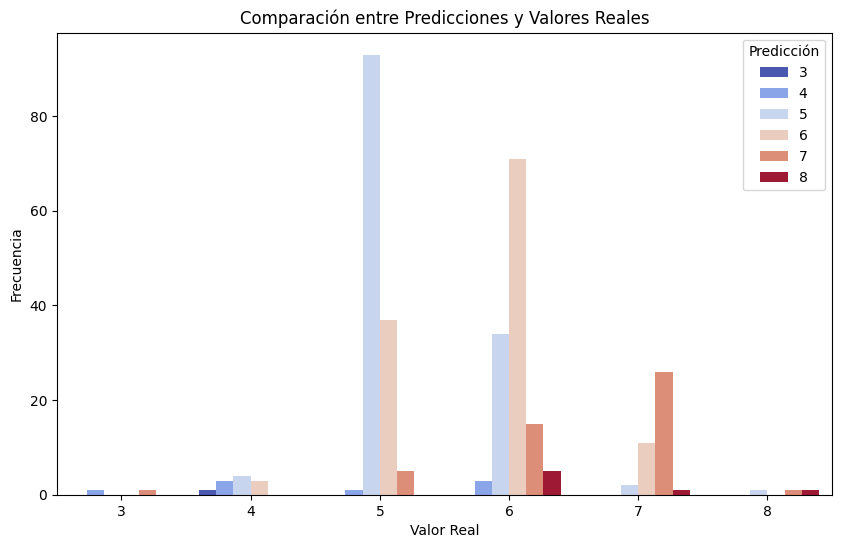

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar el dataset
wine_df = pd.read_csv('./Calidad_de_vinos.csv', delimiter=';')
print(wine_df.head())


# Dividir en características (X) y variable objetivo (y)
X = wine_df.drop('quality', axis=1)  # Todas las características químicas
y = wine_df['quality']  # Variable objetivo (calidad del vino)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


# Evaluación del modelo de Árbol de Decisión
tree_report = classification_report(y_test, y_pred_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)
print("Reporte de clasificación - Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(tree_report)


# Matriz de Confusión del Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Importancia de las Características
feature_importances = tree_clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Importancia de las Características - Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Distribución de la Calidad del Vino
plt.figure(figsize=(8, 6))
sns.countplot(data=wine_df, x='quality', palette='Set3')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Comparación entre Predicciones y Valores Reales
comparison_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_tree})
comparison_counts = comparison_df.groupby(['Real', 'Predicción']).size().reset_index(name='Frecuencia')

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_counts, x='Real', y='Frecuencia', hue='Predicción', palette='coolwarm')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Frecuencia')
plt.legend(title='Predicción', loc='upper right')
plt.show()
